<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Econo_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import sklearn.metrics as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tqdm.notebook import tqdm
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')



def StandardScaleData(data):
  scaler = StandardScaler()
  scaler.fit(data)
  return  scaler.transform(data)


def MinMaxScaleData(data):
  scaler = MinMaxScaler()
  scaler.fit(data)
  return scaler.transform(data)







def show_res(y_actual, y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))




def actual_vs_pred(y_actual, y_pred):
  pred_y_df=pd.DataFrame(
    {
        "Actual_Value":y_actual,
        "Predicted_Value":y_pred,
        "Difference":y_actual-y_pred
    }
    )

  sns.set(rc={'figure.figsize':(10,20)})
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )

def single_pred(model,data):
  test_sub = {
    'open':[data[0]],
    'high':[data[1]],
    'low':[data[2]]
  }
  test_sub_df = pd.DataFrame(test_sub)

  ex_specie = np.array(test_sub_df.iloc[0]).reshape(1,-1)

  return model.predict(ex_specie)




def test_other_file(model,f_list):
  for i in tqdm(f_list):
    print()
    print(os.path.basename(i))
    test_dataset = pd.read_json(i,typ='series')
    test_df = pd.DataFrame(test_dataset['data'])

    test_X=df.iloc[:,0:3]
    test_y=df.loc[:,'close']

    pred_y = model.predict(test_X)

    show_res(test_y,pred_y)
    print("____________________________________________")
    print("___________                  _______________")
    print()


def k_cv(model, X_, y_,splits):
  folds = KFold(n_splits = splits, shuffle = True, random_state = 100)
  scores = cross_val_score(krr, X_, y_, scoring='r2', cv=folds)
  for k,i in enumerate(scores):
   print("Accuracy: ",i," -----for k: ",k)
  print("Avg: ",scores.sum()/len(scores))
  return scores.sum()/len(scores)

In [3]:
import numpy as np
import pandas as pd
import os
from glob2 import glob

In [4]:
path = "/content/drive/MyDrive/RDocs/trading-research-main/NSE-Data/Equity/Intraday-1m-ohlcv/APOLLOHOSP"

In [5]:
file_list = glob(path+"/*")

In [6]:
#dataset = pd.read_json("/content/drive/MyDrive/RDocs/trading-research-main/NSE-Data/Equity/Historical-ohlcv/ADANIENT/ADANIENT-2000-01-01-2023-05-31.json",typ='series')
dataset = pd.read_json(file_list[0],typ='series')

In [7]:
dataset.head()

status                                               success
remarks                                                     
data       {'open': [4605.0, 4571.35, 4578.65, 4578.2, 45...
dtype: object

In [8]:
df = pd.DataFrame(dataset['data'])

In [9]:
df.shape

(375, 6)

In [10]:
df.head(5)

,open,high,low,close,volume,start_Time
0,4605.00,4605.00,4563.45,4571.35,8223.0,2023-05-23 09:15:00
1,4571.35,4580.00,4566.25,4578.65,2245.0,2023-05-23 09:16:00
2,4578.65,4581.45,4571.05,4580.00,2506.0,2023-05-23 09:17:00
3,4578.20,4583.00,4572.80,4572.80,2210.0,2023-05-23 09:18:00
4,4571.00,4571.00,4561.20,4561.60,1860.0,2023-05-23 09:19:00


#Spliting : X and y

In [24]:
X=df.iloc[:,0:3]
y=df.loc[:,'close']

#Spliting: Training and Testing

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



---



#Training Sections

##Kernel Ridge Regression

In [32]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)
y_pred = krr.predict(X_test)

In [ ]:
show_res(y_test,y_pred)

Mean absolute error = 1.34
Mean squared error = 2.96
Median absolute error = 1.06
Explain variance score = 0.99
R2 score = 0.99


In [ ]:
X.iloc[0]

open    4605.00
high    4605.00
low     4563.45
Name: 0, dtype: float64

In [ ]:
y.iloc[0]

4571.35

In [ ]:
single_pred(krr,list(X.iloc[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KernelRidge was fitted with feature names
  warnings.warn(


array([4570.19106205])

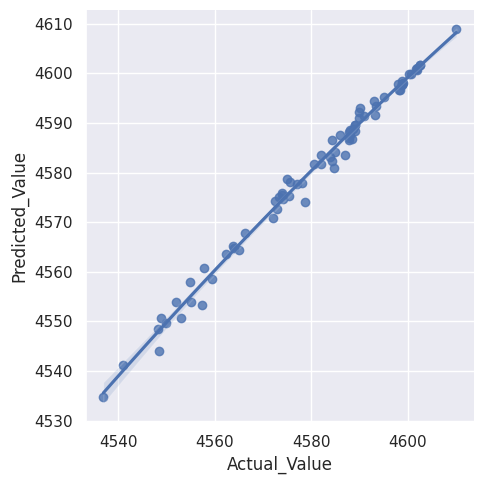

In [ ]:
actual_vs_pred(y_test,y_pred)

In [49]:
k_cv(krr,X_test,y_test,10)

Accuracy:  0.9709331568945043  -----for k:  0
Accuracy:  0.9841108831130456  -----for k:  1
Accuracy:  0.9863729648657418  -----for k:  2
Accuracy:  0.9885953569807344  -----for k:  3
Accuracy:  0.9935021415097686  -----for k:  4
Accuracy:  0.9884405991116794  -----for k:  5
Accuracy:  0.9958186765421153  -----for k:  6
Accuracy:  0.9737681559747313  -----for k:  7
Accuracy:  0.9934936045353542  -----for k:  8
Accuracy:  0.9855395515655477  -----for k:  9
Avg:  0.9860575091093222


0.9860575091093222

##Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

In [ ]:
show_res(y_test,y_pred)

Mean absolute error = 1.32
Mean squared error = 2.96
Median absolute error = 0.95
Explain variance score = 0.99
R2 score = 0.99


In [ ]:
X_test.iloc[1]

open    4591.0
high    4591.0
low     4587.0
Name: 296, dtype: float64

In [ ]:
y_test.iloc[1]

4587.9

In [ ]:
single_pred(lin_reg,list(X.iloc[1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4574.11709307])

In [52]:
k_cv(lin_reg,X_test,y_test,10)

Accuracy:  0.9709331568945043  -----for k:  0
Accuracy:  0.9841108831130456  -----for k:  1
Accuracy:  0.9863729648657418  -----for k:  2
Accuracy:  0.9885953569807344  -----for k:  3
Accuracy:  0.9935021415097686  -----for k:  4
Accuracy:  0.9884405991116794  -----for k:  5
Accuracy:  0.9958186765421153  -----for k:  6
Accuracy:  0.9737681559747313  -----for k:  7
Accuracy:  0.9934936045353542  -----for k:  8
Accuracy:  0.9855395515655477  -----for k:  9
Avg:  0.9860575091093222


0.9860575091093222

##Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

deci_regr = DecisionTreeRegressor()
deci_regr.fit(X_train, y_train)
y_pred = deci_regr.predict(X_test)

In [ ]:
show_res(y_test,y_pred)

Mean absolute error = 1.98
Mean squared error = 11.8
Median absolute error = 1.0
Explain variance score = 0.96
R2 score = 0.96


In [ ]:
X_test.iloc[1]

open    4591.0
high    4591.0
low     4587.0
Name: 296, dtype: float64

In [ ]:
y_test.iloc[1]

4587.9

In [ ]:
single_pred(deci_regr,list(X.iloc[1]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([4578.])

##Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)


In [ ]:
show_res(y_test,y_pred)

Mean absolute error = 1.54
Mean squared error = 6.03
Median absolute error = 1.03
Explain variance score = 0.98
R2 score = 0.98


In [ ]:
X_test.iloc[1]

open    4591.0
high    4591.0
low     4587.0
Name: 296, dtype: float64

In [ ]:
y_test.iloc[1]

4587.9

In [ ]:
single_pred(rf_reg,list(X.iloc[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4573.5605])

###Lasso Regressor

In [ ]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_test)

In [ ]:
show_res(y_test,y_pred)

Mean absolute error = 1.54
Mean squared error = 6.03
Median absolute error = 1.03
Explain variance score = 0.98
R2 score = 0.98


In [ ]:
X_test.iloc[1]

open    4591.0
high    4591.0
low     4587.0
Name: 296, dtype: float64

In [ ]:
y_test.iloc[1]

4587.9

In [ ]:
single_pred(lasso,list(X.iloc[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([4570.94387279])

#Testng for another dataset

##With Kernel Ridge Regression

In [ ]:
test_other_file(krr,file_list)



  0%|          | 0/23 [00:00<?, ?it/s]


APOLLOHOSP-1m-2023-05-23.json
Mean absolute error = 1.29
Mean squared error = 2.77
Median absolute error = 1.04
Explain variance score = 0.99
R2 score = 0.99
____________________________________________
___________                  _______________


APOLLOHOSP-1m-2023-05-30.json
Mean absolute error = 1.29
Mean squared error = 2.77
Median absolute error = 1.04
Explain variance score = 0.99
R2 score = 0.99
____________________________________________
___________                  _______________


APOLLOHOSP-1m-2023-05-24.json
Mean absolute error = 1.29
Mean squared error = 2.77
Median absolute error = 1.04
Explain variance score = 0.99
R2 score = 0.99
____________________________________________
___________                  _______________


APOLLOHOSP-1m-2023-05-22.json
Mean absolute error = 1.29
Mean squared error = 2.77
Median absolute error = 1.04
Explain variance score = 0.99
R2 score = 0.99
____________________________________________
___________                  _______________

